<a href="https://colab.research.google.com/github/HariniThiyagarajan05/PythonProjectFinal/blob/main/Copy_of_Assignment1_template_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

In this assignment, a dataset with monthly index level of S&P 500(SP) is provided. The goal is to perform exploratory data analysis with python basic data structure and pandas and data pre-processing skill.

Complete the given tasks below. (Notice each of the missing code to be filled is a single line command, more than one command line will be downgraded)

<h1 style="color:purple">Author</h1>

  
- Name: Harini Thiyagarajan, Tanya Sachanandani, Kashish Keswani              
- Student ID: 20993215, 20987462, 20994001

In [ ]:
!pip install yfinance
# numpy is for data structure array and efficient scientific computation
import numpy as np
# pandas is for the data structure data.frame
import pandas as pd
# graphic packages
import matplotlib.pyplot as plt
# Stock price sourcing from Yahoo Finance
import yfinance as yf

In [ ]:
# This cell contains the code to download stock price data from Yahoo;
# You need to compile this cell to download the data.
# But no need to understand this part as the features of this pakcage is out of the syllabus.
start_date ='2011-01-01'
end_date = '2023-12-30'

SP = yf.download('^GSPC',start_date,end_date,interval='1mo')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


## Part I: Understand the example code.

In [ ]:
SP.head()

Date
2011-01-01    1286.119995
2011-02-01    1327.219971
2011-03-01    1325.829956
2011-04-01    1363.609985
2011-05-01    1345.199951
Name: Adj Close, dtype: float64

In [ ]:
#mean and sd of SP500
SP.mean(), SP.std()

(2650.715771014874, 1039.6907332252185)

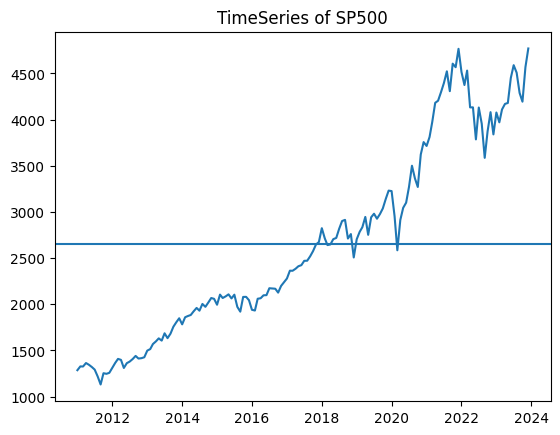

In [ ]:
# Plotting the time/line plot of SP500, and a reference line of the mean price
plt.plot(SP)
mean_price = SP.mean()
plt.title('TimeSeries of SP500')
plt.axhline(mean_price) #reference line of the mean price
plt.show()

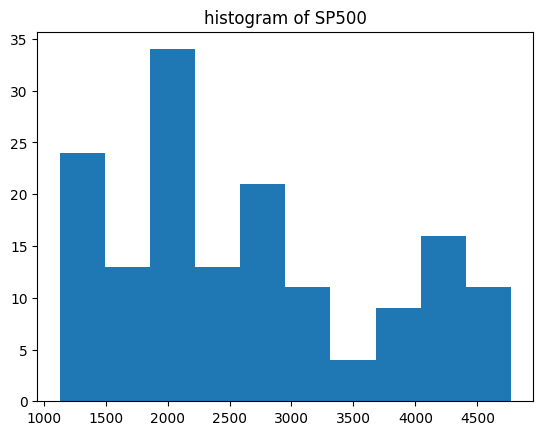

In [ ]:
plt.hist(SP)
plt.title('histogram of SP500')
plt.show()

### Tast 1: Creating the monthly simple return of SP500 [5pts]
- Recall simple return = (price_thisMonth-price_lastMonth)/price_lastMonth

In [ ]:
SP_later=SP.shift(1)
re_SP1=(SP-SP_later)/SP_later
re_SP1.head()

Date
2011-01-01         NaN
2011-02-01    0.031957
2011-03-01   -0.001047
2011-04-01    0.028495
2011-05-01   -0.013501
Name: Adj Close, dtype: float64

In [ ]:
re_SP=SP.pct_change()
re_SP.head()

Date
2011-01-01         NaN
2011-02-01    0.031957
2011-03-01   -0.001047
2011-04-01    0.028495
2011-05-01   -0.013501
Name: Adj Close, dtype: float64

### Task 2: Removing missing value [5pts]

In [ ]:
re_SP=re_SP.dropna()
re_SP.head()

Date
2011-02-01    0.031957
2011-03-01   -0.001047
2011-04-01    0.028495
2011-05-01   -0.013501
2011-06-01   -0.018257
Name: Adj Close, dtype: float64

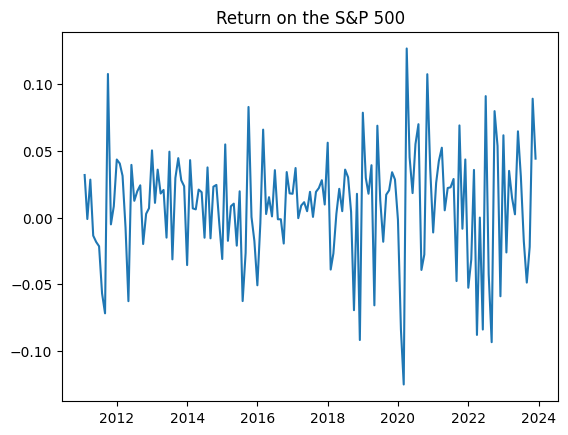

In [ ]:
# Plotting the time plot of SP500 monthly return
plt.plot(re_SP)
plt.title("Return on the S&P 500")
plt.show()

### Task 3: Calculate the mean, sd [5pts]; how many observations (returns) are less than the mean? [5pts]

In [ ]:
mean = re_SP.mean()
sd = re_SP.std()
n_below_mean = (re_SP<mean).value_counts()[True]
print(f"mean:{mean}, sd:{sd}, number of values below the mean:{n_below_mean}")

mean:0.009369122954723674, sd:0.041965297132552086, number of values below the mean:71


### Task4: Compute 5th-percentile of the monthly return [5pts]; Draw a histogram for monthly return [5pts] and a vertical reference line (red color) of 5th-percentile [5pts]

In [ ]:
percentile5 = re_SP.quantile([0.05]).values[0]
percentile5

-0.06686541878489367

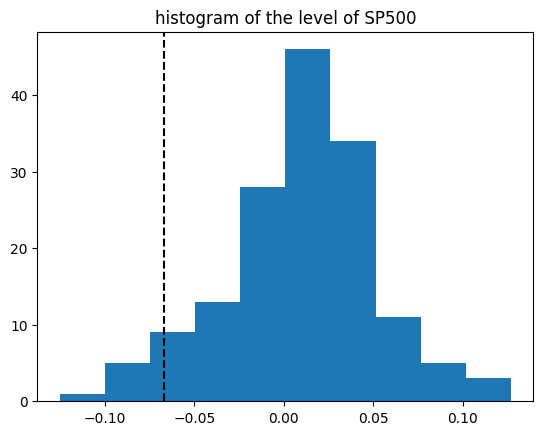

In [ ]:
plt.hist(re_SP)
plt.title('histogram of the level of SP500')
plt.axvline(percentile5, color='Black', linestyle='dashed')
plt.show()

### Task 5: Calculate the mean for all the return less than the 5th-percentile; [5pts]

In [ ]:
mean_condition = re_SP[re_SP.values<percentile5].mean()
mean_condition

-0.08843054858166761

### Task 6: Draw a scatter plot between current month's return (x-asix) and next month's return (y-asix) (use green color dots) [5pts]


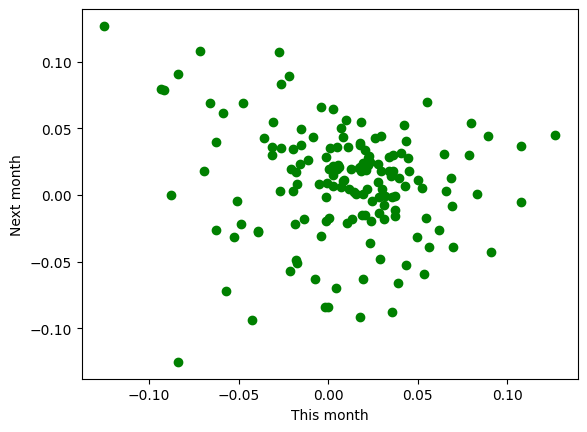

In [ ]:
this_month=re_SP
next_month=re_SP.shift(-1)
plt.scatter(this_month,next_month, color="green")
plt.xlabel("This month")
plt.ylabel("Next month")
plt.show()

###  -  According to the scatter plot, does current return help in predicting next month return? Further confirm your thought by their correlation. Briefly explain. Further confirm your thought by their correlation [5pts]


No, it does not, because visually, there is no clear correlation between the two variables, as all the dots are displayed arbitrarily and seem to have no relation to each other.

In [ ]:
this_month=pd.Series(re_SP,name="This Month")
next_month=pd.Series(re_SP.shift(-1),name="Next Month")
corrData=pd.DataFrame([this_month,next_month])
corrData.transpose().corr()

,This Month,Next Month
This Month,1.000000,-0.153488
Next Month,-0.153488,1.000000


As you can see, the correlation is -0.15 which suggests an extremely weak negative correlation between the returns of this month and the returns of next month, hence, out hypothesis above is proven correct statistically.